#  Users of Ford GoBike System
## by  Abdulaziz Alqumayzi

## Investigation Overview

In this investigation, I want to check the type of users of the Ford GoBike system and how much time they spend riding the bike and which method users prefer to rent the bike. 

## Dataset Overview

Bay Wheels is a regional public bicycle sharing system in California's San Francisco Bay Area. It is operated by Motivate in a partnership with the Metropolitan Transportation Commission and the Bay Area Air Quality Management District. Bay Wheels is the first regional and large-scale bicycle sharing system deployed in California and on the West Coast of the United States. It was established as Bay Area Bike Share in August 2013. As of January 2018, the Bay Wheels system had over 2,600 bicycles in 262 stations across San Francisco, East Bay and San Jose.

In June 2017 the system was officially re-launched as Ford GoBike in a partnership with Ford Motor Company. After Motivate's acquisition by Lyft, the system was renamed to Bay Wheels in June 2019. The system is expected to expand to 7,000 bicycles around 540 stations in San Francisco, Oakland, Berkeley, Emeryville, and San Jose.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
gobike = pd.read_csv('202003-baywheels-tripdata.csv')

In [3]:
# Change data type for some of the columns 

# start_time and end_time to datetime 
gobike.start_time = pd.to_datetime(gobike.start_time)
gobike.end_time = pd.to_datetime(gobike.end_time)

# usre_type and rental_access_method to category type
gobike.user_type = gobike.user_type.astype('category')
gobike.rental_access_method = gobike.rental_access_method.astype('category')

# start_station_id, end_station_id and bike_id to string 
gobike.start_station_id = gobike.start_station_id.astype(str)
gobike.end_station_id = gobike.end_station_id.astype(str)
gobike.bike_id = gobike.bike_id.astype(str)

## Trip Duration per Seconds

On the left chart, I cannot get any insight from the chart. On the right graph, the trip duration time is between 400 and 800 seconds.

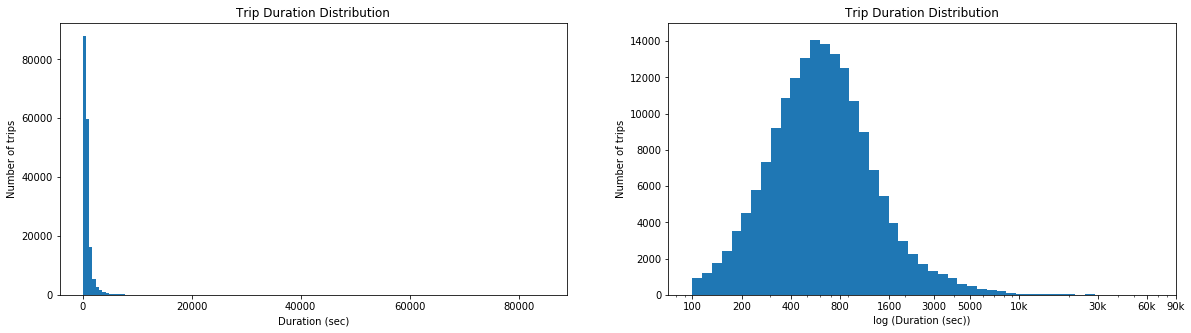

In [4]:
plt.figure(figsize=[20,5])

plt.subplot(1,2,1)
bins_edges = np.arange(0, gobike.duration_sec.max()+600 , 600)
plt.hist(data= gobike, x='duration_sec', bins = bins_edges)
plt.title('Trip Duration Distribution')
plt.xlabel('Duration (sec)')
plt.ylabel('Number of trips')

plt.subplot(1,2,2)
bins_edges_2 = 10 ** np.arange(2, np.log10(gobike.duration_sec.max())+0.06 , 0.06)
plt.hist(data= gobike, x='duration_sec', bins = bins_edges_2)
plt.xscale('log')
plt.xticks([100,200,400,800,1600,3e3,5e3,1e4,3e4,6e4,9e4],[100,200,400,800,1600,3000,5000,'10k','30k','60k','90k'])
plt.title('Trip Duration Distribution')
plt.xlabel('log (Duration (sec))')
plt.ylabel('Number of trips')
plt.axis([0, 90000, 0, 15000]);

## User Types and Rental Access Method Distributions

The chart on the left side shows that subscribers are the most of users.

The chart on the right side shows a massive difference between the use of the app with respect to the clipper.

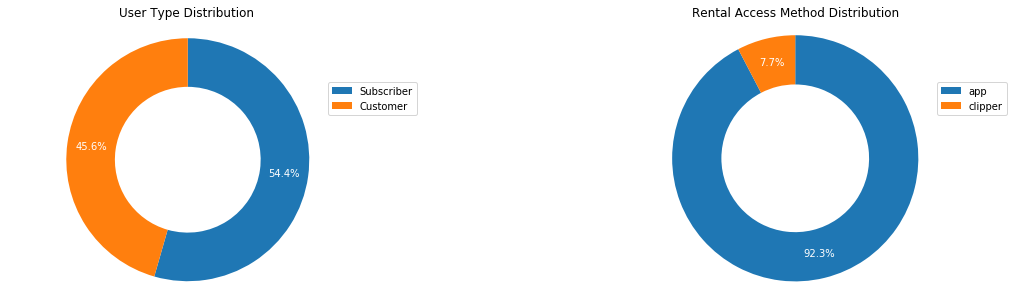

In [5]:
plt.figure(figsize=[20,5])

plt.subplot(1,2,1)
sorted_user = gobike.user_type.value_counts()
plt.pie(sorted_user, labels = sorted_user.index, startangle = 90,
        counterclock = False, wedgeprops = {'width' : 0.4},autopct= '%1.1f%%',textprops={'color':'w'},pctdistance=0.8);
plt.axis('square')
plt.title('User Type Distribution')
plt.legend(sorted_user.index,  bbox_to_anchor = (1, 0.8))

plt.subplot(1,2,2)
sorted_rental = gobike.rental_access_method.value_counts()
plt.pie(sorted_rental, labels = sorted_rental.index, startangle = 90,
        counterclock = False, wedgeprops = {'width' : 0.4},autopct= '%1.1f%%',textprops={'color':'w'}, pctdistance=0.8);
plt.axis('square')
plt.title('Rental Access Method Distribution')
plt.legend(sorted_rental.index,  bbox_to_anchor = (1, 0.8));

## The Average Duration on User Type with Rental Access Method

The duration time average is higher for the customer than the subscriber. Whether they are using the rental access method for the app or clipper. The average duration ride for a customer that using the app is 1535 and the who is using clipper is 770. For a subscriber, the average duration time for a ride and using the app is 756, and the who is using the clipper is 654.

In [6]:
# This copy for change data type of start_station_id and end_station_id variables to numeric 
gobike_start_end = gobike.copy()
gobike_start_end.start_station_id = gobike_start_end.start_station_id.astype(float)
gobike_start_end.end_station_id = gobike_start_end.end_station_id.astype(float)
gobike_start_end = gobike_start_end.dropna(subset=['start_station_id','end_station_id'])

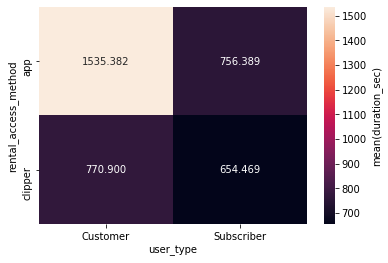

In [7]:
cat_means = gobike_start_end.groupby(['user_type', 'rental_access_method']).mean()['duration_sec']
cat_means = cat_means.reset_index(name = 'duration_sec')
cat_means = cat_means.pivot(index = 'rental_access_method', columns = 'user_type',
                            values = 'duration_sec')
sb.heatmap(cat_means, annot = True, fmt = '.3f',
           cbar_kws = {'label' : 'mean(duration_sec)'});